# Problem 1 (Theorem 4)

###### submitted by: Amin Shojaeighadikolaei

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation
from sklearn.preprocessing import OneHotEncoder


In [2]:
def One_hot(X):   
    onehot_encoder = OneHotEncoder(sparse=False)
    temp = X.reshape(len(X), 1)
    onehots = onehot_encoder.fit_transform(temp)
    return(onehots)


def normalize(data):
    return ((data - data.mean()) / np.sqrt(np.var(data)))

def sigmoid(data):
    return 1 / (1 + np.exp(-data))

In [3]:
input_size = 16
output_size = 8
nSamples = 5000

In [4]:
# randomly pick joint distribution, normalize
Pxy = np.random.random([output_size, input_size])
Pxy = Pxy / np.sum(np.sum(Pxy,axis=0),axis=0)
#  # compute marginals
Px = np.sum(Pxy, axis = 0)
Py = np.sum(Pxy, axis = 1)

X=np.random.choice(range(input_size),nSamples,p=Px)
Y=np.random.choice(range(output_size),nSamples,p=Py)

x_train = One_hot(X)
y_train = One_hot(Y)

In [5]:
B = (Pxy- Px.reshape(1, -1)*Py.reshape(-1, 1))/ np.sqrt(Px.reshape(1, -1)) * np.sqrt(Py.reshape(-1, 1))
phi_y, phi, phi_x = np.linalg.svd(B)
f_i = phi_x[1,:] / np.sqrt(Px)
g_i = phi_y[:,1] / np.sqrt(Py)

In [6]:

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=input_size))
model.add(Dense(output_size, activation='softmax', input_dim=1))

sgd = SGD(4, decay=1e-2, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(x_train, y_train, verbose=0, batch_size=nSamples, epochs=200) 

In [7]:
weights = model.get_weights()

In [8]:
s = weights[0].reshape(1, input_size)
s = sigmoid(s + weights[1])
f=normalize(s)
f = f * np.sign(sum(f*f_i))
f_i=normalize(f_i)
v = weights[2]
g=normalize(v)
g = g * np.sign(sum(g*g_i))
g_i=normalize(g_i)
mu = np.matmul(s, Px)
bias = weights[3]
b=normalize(bias)
b_theory = np.log(Py) - mu * v
b_theory = b_theory.reshape(-1)
b_theory = normalize(b_theory)

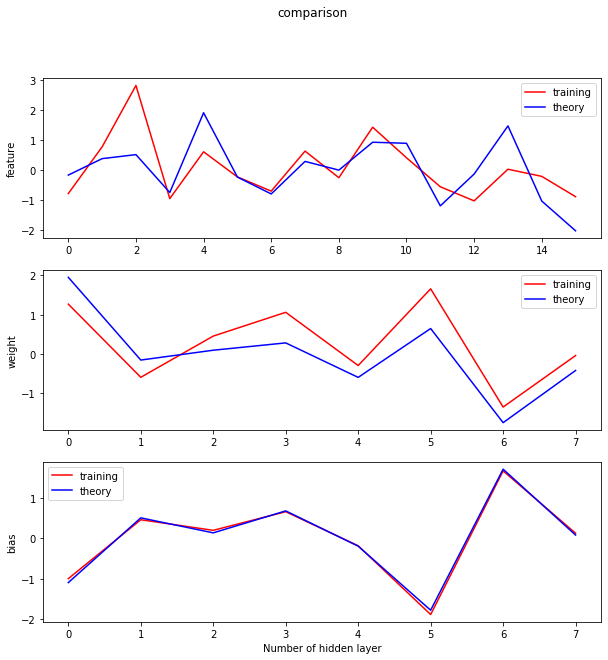

In [9]:
fig, axs= plt.subplots(3, figsize=(10,10))
fig.suptitle('comparison')


axs[0].plot(range(input_size),f.reshape(-1), color='red',label='training')
axs[0].plot(range(input_size),f_i, color='blue',label='theory')
axs[0].set_ylabel('feature')
axs[0].legend()

axs[1].plot(range(output_size),g.reshape(-1), color='red',label='training')
axs[1].plot(range(output_size),g_i, color='blue',label='theory')
axs[1].set_ylabel('weight')
axs[1].legend()

axs[2].plot(range(output_size),b, color='red',label='training')
axs[2].plot(range(output_size), b_theory, color='blue',label='theory')
axs[2].set_ylabel('bias')
axs[2].legend()

plt.xlabel('Number of hidden layer')
plt.savefig('comparison for test.png')
plt.show()